In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mumbai House Prices.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


In [4]:
data.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [5]:
data.describe()

,bhk,area,price
count,76038.000000,76038.000000,76038.00000
mean,2.015111,1024.536850,29.38227
std,0.922754,670.276165,32.90345
min,1.000000,127.000000,1.00000
25%,1.000000,640.000000,1.75000
50%,2.000000,872.000000,5.50000
75%,3.000000,1179.000000,59.00000
max,10.000000,16000.000000,99.99000


In [6]:
data.isnull().sum()

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64

In [7]:
for column in data.columns:
    print(data[column].value_counts())

2     31429
1     24613
3     15273
4      3934
5       606
6       148
7        16
8         8
10        6
9         5
Name: bhk, dtype: int64
Apartment            74854
Studio Apartment       882
Villa                  226
Independent House       73
Penthouse                3
Name: type, dtype: int64
Hiranandani Meadows                    861
Sheth Avalon                           516
T Bhimjyani The Verraton               499
ACME Ozone Phase 2                     467
Runwal Gardens                         389
                                      ... 
HP Anton CHSL Rishab Anton               1
Reputed Builder Shankar Heritage         1
Reputed Builder Aishwarya Apartment      1
Reputed Builder Vinit Tower              1
Hubtown Serene                           1
Name: locality, Length: 9782, dtype: int64
650     1662
1050    1381
1100    1151
1650    1041
750      950
        ... 
2369       1
1945       1
1442       1
2672       1
3049       1
Name: area, Length: 2331, dtype: int6

In [8]:
#convert price crore to lakh 
convert_crore_to_lakh = 100    # 1 crore = 100 lakh
def convert_to_lakhs(row):
    if row["price_unit"]=="L":
        return row["price"]
    elif row["price_unit"]=="Cr":
        return row["price"]*convert_crore_to_lakh

In [9]:
data["price_lakh"]=data.apply(convert_to_lakhs,axis=1)

In [10]:
data.head()

,bhk,type,locality,area,price,price_unit,region,status,age,price_lakh
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New,250.00
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New,52.51
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New,173.00
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New,59.98
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New,94.11


In [11]:
data = data.drop(['locality','price','price_unit','status','age'],axis=1)

In [12]:
data.head()

,bhk,type,area,region,price_lakh
0,3,Apartment,685,Andheri West,250.00
1,2,Apartment,640,Naigaon East,52.51
2,2,Apartment,610,Borivali West,173.00
3,2,Apartment,876,Panvel,59.98
4,2,Apartment,659,Mira Road East,94.11


In [13]:
data['type'].value_counts()

Apartment            74854
Studio Apartment       882
Villa                  226
Independent House       73
Penthouse                3
Name: type, dtype: int64

In [14]:
data['region'].value_counts()

Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: region, Length: 228, dtype: int64

In [15]:
data['region']=data['region'].apply(lambda x: x.strip())
region_count = data['region'].value_counts()

In [16]:
region_count

Thane West         14868
Mira Road East      9902
Dombivali           3041
Kandivali East      2568
Kharghar            2362
                   ...  
Police Colony          1
GTB Nagar              1
Bandra                 1
Sector 14 Vashi        1
Goregaon               1
Name: region, Length: 228, dtype: int64

In [17]:
region_count_less_10 = region_count[region_count<=10]
region_count_less_10

Kanjurmarg East      10
Vasind               10
Sector 20 Kamothe    10
Koproli              10
Cuffe Parade          9
                     ..
Police Colony         1
GTB Nagar             1
Bandra                1
Sector 14 Vashi       1
Goregaon              1
Name: region, Length: 114, dtype: int64

In [18]:
data['region']=data['region'].apply(lambda x:'other' if x in region_count_less_10 else x)

In [19]:
data['region'].value_counts()

Thane West           14868
Mira Road East        9902
Dombivali             3041
Kandivali East        2568
Kharghar              2362
                     ...  
Sector 21 Kamothe       16
Kalwa                   15
Nalasopara East         15
Vangani                 13
Saphale                 12
Name: region, Length: 115, dtype: int64

In [20]:
data['price_per_sqft']=data['price_lakh']*100000/data['area']

In [21]:
data.describe()

,bhk,area,price_lakh,price_per_sqft
count,76038.000000,76038.000000,76038.000000,76038.000000
mean,2.015111,1024.536850,168.417795,15118.812074
std,0.922754,670.276165,217.665511,9332.899565
min,1.000000,127.000000,4.490000,646.766169
25%,1.000000,640.000000,64.000000,8571.428571
50%,2.000000,872.000000,110.000000,13000.000000
75%,3.000000,1179.000000,194.000000,19496.115827
max,10.000000,16000.000000,6000.000000,182307.692308


In [22]:
data.isnull().sum()

bhk               0
type              0
area              0
region            0
price_lakh        0
price_per_sqft    0
dtype: int64

In [23]:
def rmv_out_sqft(df):
    df_output = pd.DataFrame()
    for key,subdf in df.groupby('region'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        
        gen_df =subdf[(subdf.price_per_sqft>(m-std))&(subdf.price_per_sqft<(m+std))]
        df_output = pd.concat([df_output,gen_df],ignore_index=True)
    return df_output

In [24]:
df1 = rmv_out_sqft(data)
df1.describe()

,bhk,area,price_lakh,price_per_sqft
count,57406.000000,57406.000000,57406.000000,57406.000000
mean,1.992161,1030.850381,156.741405,14215.289653
std,0.901145,639.866479,179.275851,8060.050256
min,1.000000,150.000000,9.000000,2416.666667
25%,1.000000,650.000000,64.100000,8341.750842
50%,2.000000,900.000000,109.000000,12380.952381
75%,3.000000,1187.000000,188.000000,18333.333333
max,10.000000,16000.000000,5555.000000,67307.692308


In [25]:
df1.isnull().sum()

bhk               0
type              0
area              0
region            0
price_lakh        0
price_per_sqft    0
dtype: int64

In [26]:
df1

,bhk,type,area,region,price_lakh,price_per_sqft
0,2,Apartment,650,Agripada,262.0,40307.692308
1,1,Apartment,803,Agripada,225.0,28019.925280
2,1,Apartment,684,Agripada,170.0,24853.801170
3,1,Apartment,545,Agripada,160.0,29357.798165
4,2,Apartment,1650,Agripada,350.0,21212.121212
...,...,...,...,...,...,...
57401,1,Apartment,430,other,70.0,16279.069767
57402,1,Apartment,600,other,14.5,2416.666667
57403,2,Apartment,675,other,50.0,7407.407407
57404,1,Apartment,370,other,62.0,16756.756757


Text(0, 0.5, 'Count')

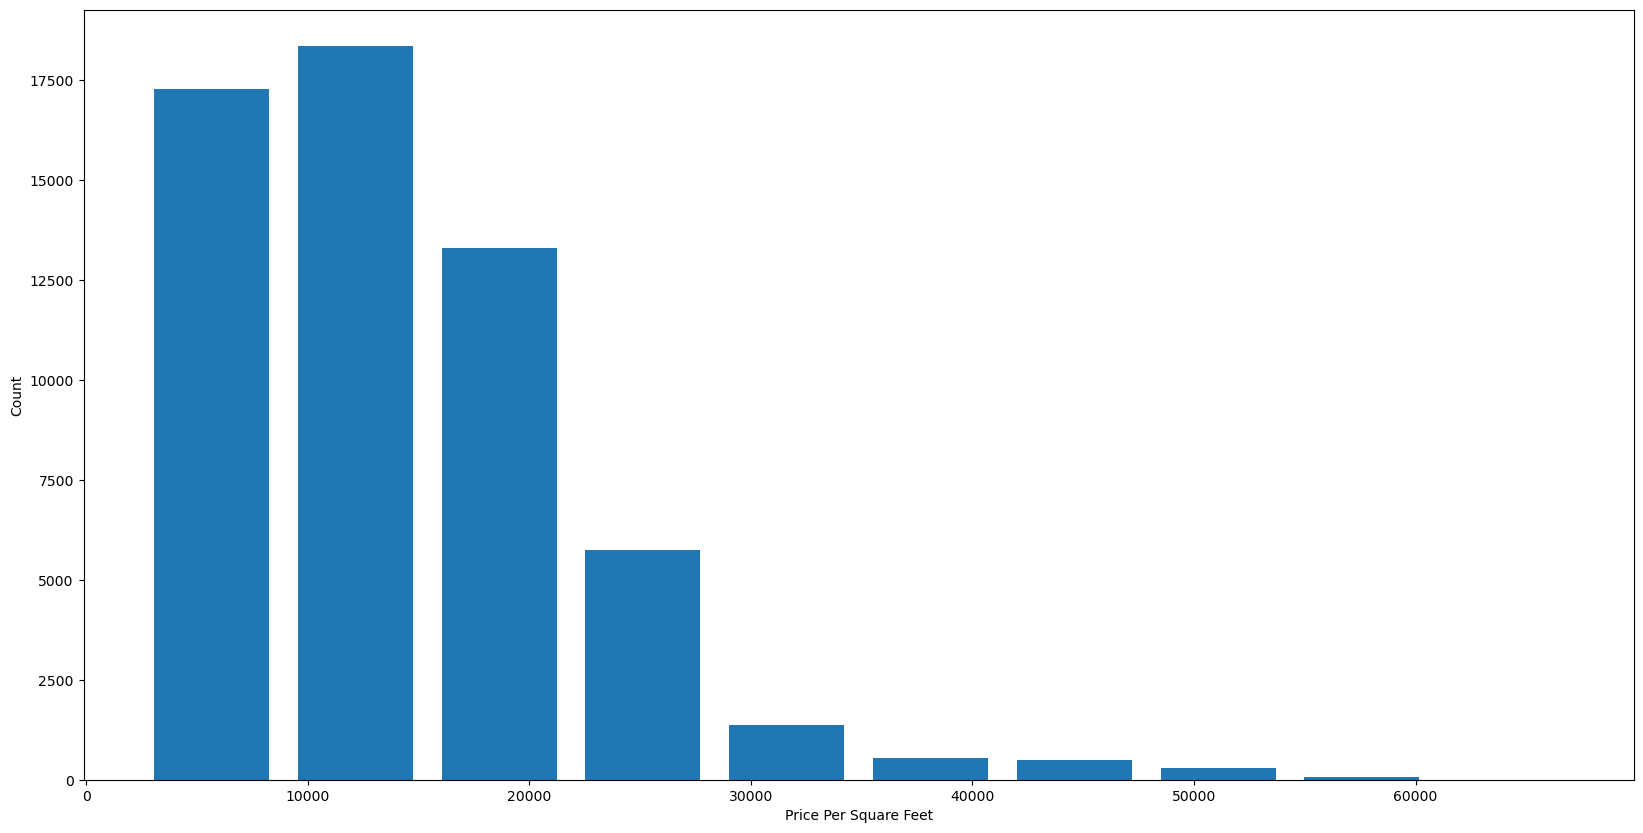

In [27]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df1.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

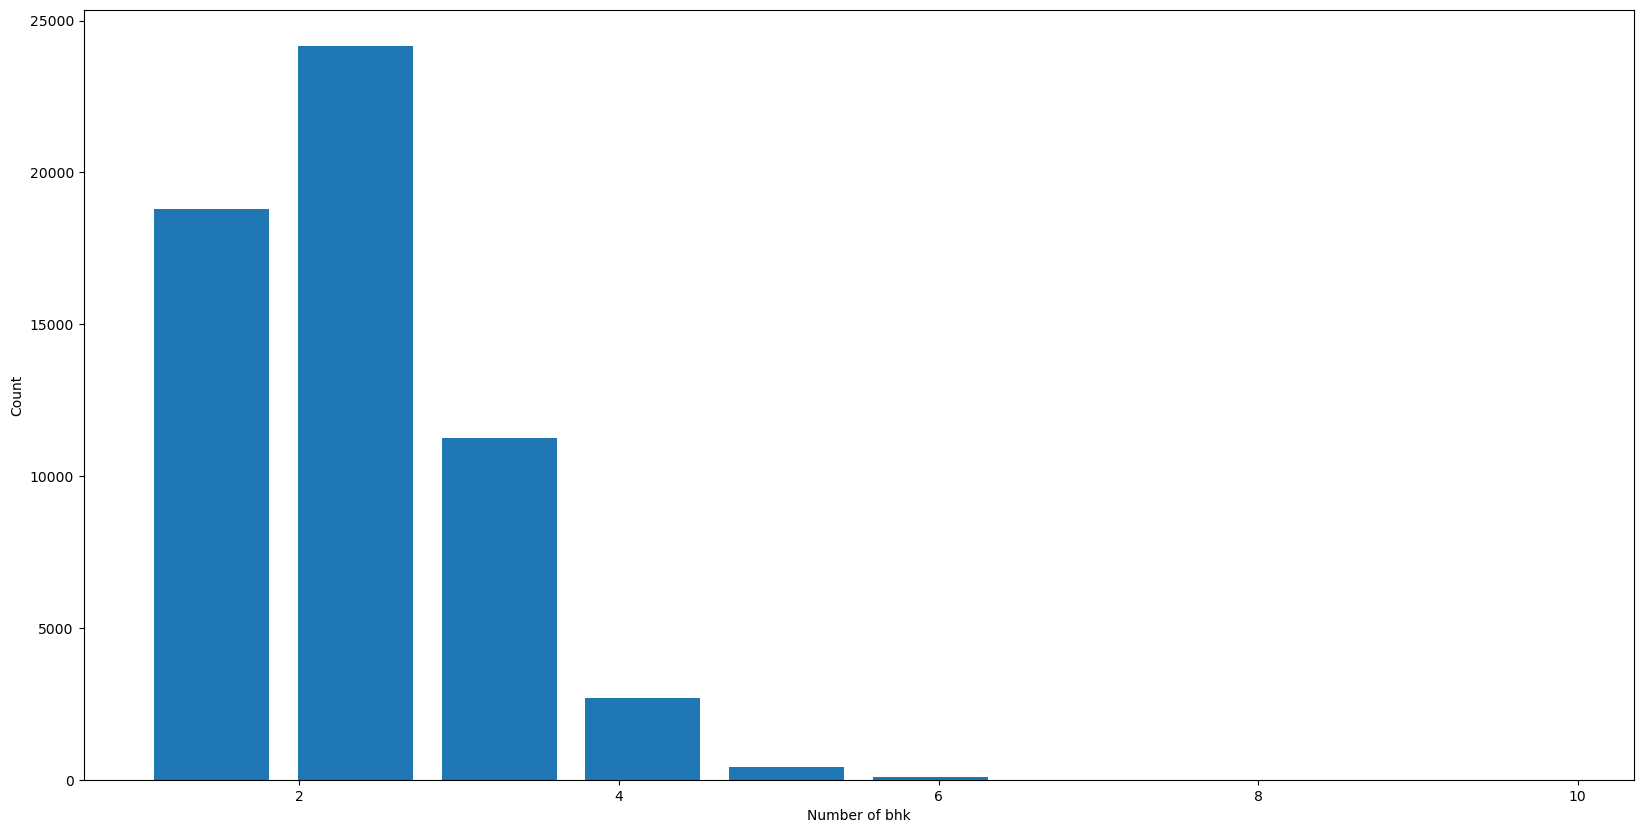

In [28]:
plt.hist(df1.bhk,rwidth=0.8)
plt.xlabel("Number of bhk")
plt.ylabel("Count")

In [29]:
dummy_areatype = pd.get_dummies(df1['type'])
dummy_areatype

,Apartment,Independent House,Penthouse,Studio Apartment,Villa
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
57401,1,0,0,0,0
57402,1,0,0,0,0
57403,1,0,0,0,0
57404,1,0,0,0,0


In [30]:
dummy_region = pd.get_dummies(df1['region'])
dummy_region.head()

,Agripada,Airoli,Ambarnath,Ambernath East,Ambernath West,Andheri East,Andheri West,Anjurdive,Badlapur East,Badlapur West,...,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df2 = pd.concat([df1,dummy_areatype,dummy_region],axis=1)
df2.head()

,bhk,type,area,region,price_lakh,price_per_sqft,Apartment,Independent House,Penthouse,Studio Apartment,...,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,other
0,2,Apartment,650,Agripada,262.0,40307.692308,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Apartment,803,Agripada,225.0,28019.925280,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Apartment,684,Agripada,170.0,24853.801170,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Apartment,545,Agripada,160.0,29357.798165,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,Apartment,1650,Agripada,350.0,21212.121212,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df2.drop(['type','region','price_per_sqft'],inplace=True,axis=1)

In [33]:
df2.isnull().sum()

bhk                  0
area                 0
price_lakh           0
Apartment            0
Independent House    0
                    ..
Virar                0
Virar West           0
Wadala               0
Worli                0
other                0
Length: 123, dtype: int64

In [34]:
df2.sample(5)

,bhk,area,price_lakh,Apartment,Independent House,Penthouse,Studio Apartment,Villa,Agripada,Airoli,...,Vasai,Vashi,Vikhroli,Ville Parle East,Ville Parle West,Virar,Virar West,Wadala,Worli,other
32696,2,980,74.95,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55831,1,582,29.75,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
35242,4,1944,300.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4406,1,555,65.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43508,2,900,110.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Split the data 

In [35]:
X = df2.drop(['price_lakh'],axis=1)
y = df2['price_lakh']

In [36]:
X.isnull().sum()

bhk                  0
area                 0
Apartment            0
Independent House    0
Penthouse            0
                    ..
Virar                0
Virar West           0
Wadala               0
Worli                0
other                0
Length: 122, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=33)

In [39]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((45924, 122), (11482, 122), (45924,), (11482,))

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [41]:
# Scale the features using StandardScaler
X_train_standard = standard_scaler.fit_transform(x_train)
X_test_standard = standard_scaler.transform(x_test)


In [42]:
# Train Linear Regression model on StandardScaler transformed data
lr_model_standard = LinearRegression()
lr_model_standard.fit(X_train_standard, y_train)

LinearRegression()

In [43]:
lr_pred_sc = lr_model_standard.predict(X_test_standard)
lr_mae_sc = mean_absolute_error(y_test,lr_pred_sc)
lr_mse_sc = mean_squared_error(y_test,lr_pred_sc)
lr_r2_sc = r2_score(y_test,lr_pred_sc)
print("MAE : ",lr_mae_sc)
print("MSE : ",lr_mse_sc)
print("R2_Score : ",lr_r2_sc)

MAE :  34.12661023139606
MSE :  3797.323576862412
R2_Score :  0.8697223383440393


### Linear Regression

In [44]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_mae = mean_absolute_error(y_test,lr_pred)
lr_mse = mean_squared_error(y_test,lr_pred)
lr_r2 = r2_score(y_test,lr_pred)
print("MAE : ",lr_mae)
print("MSE : ",lr_mse)
print("R2_Score : ",lr_r2)

MAE :  34.131084746834475
MSE :  3798.056189641603
R2_Score :  0.8696972040414601


In [45]:
lr_pred = pd.DataFrame(lr_pred)

<Axes: ylabel='Density'>

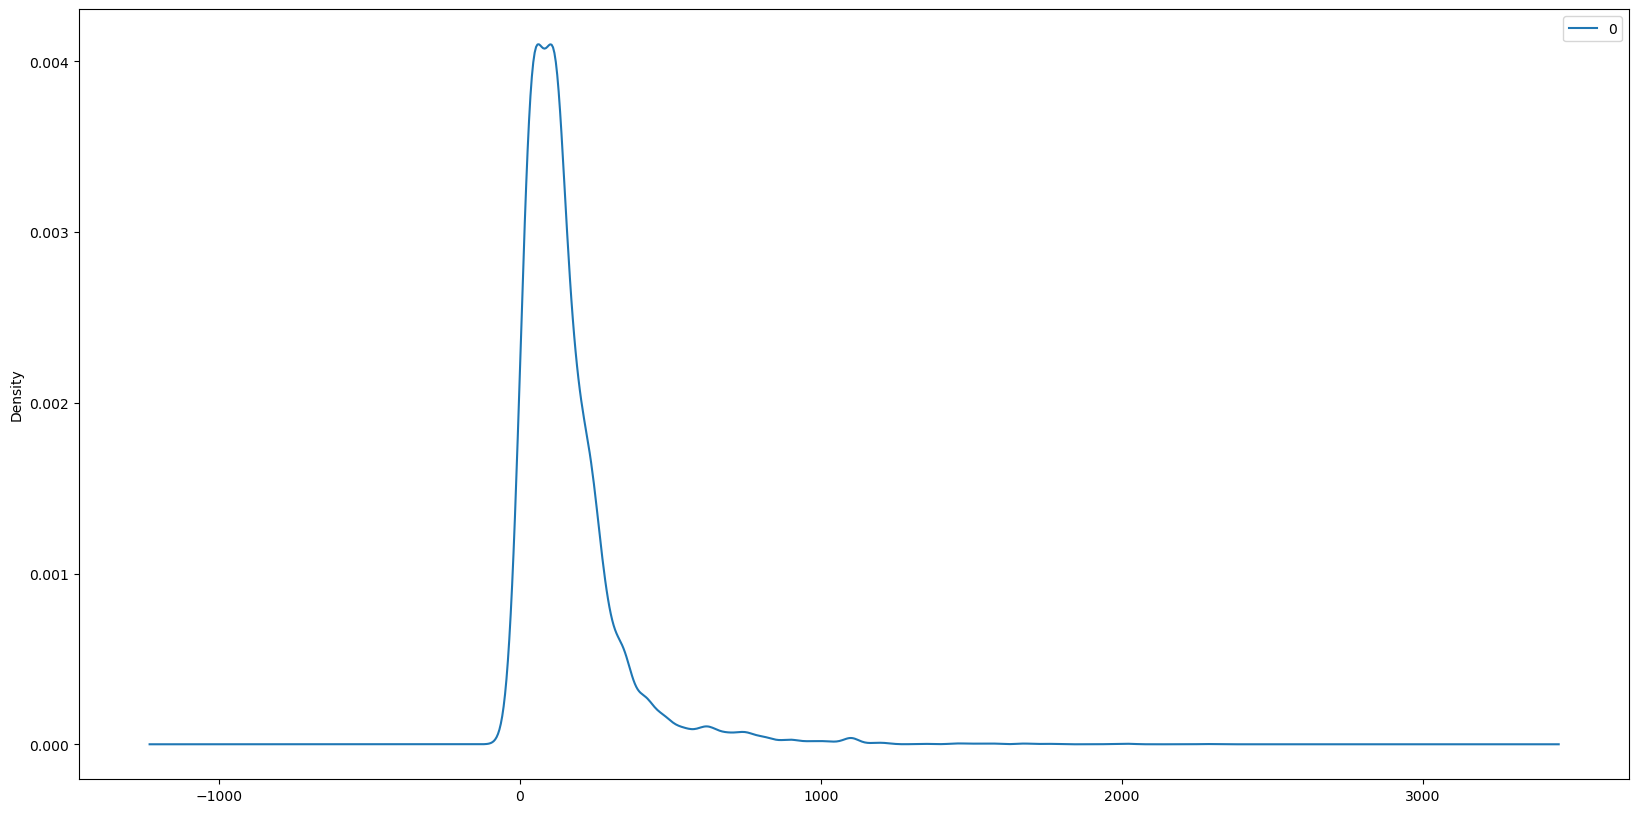

In [46]:
lr_pred.plot.kde()

In [47]:
lasso = Lasso()
lasso.fit(x_train,y_train)
lasso_pred = lasso.predict(x_test)
lasso_mae = mean_absolute_error(y_test,lasso_pred)
lasso_mse = mean_squared_error(y_test,lasso_pred)
lasso_r2 = r2_score(y_test,lasso_pred)
print("MAE : ",lasso_mae)
print("MSE : ",lasso_mse)
print("R2_Score : ",lasso_r2)

MAE :  55.30440629500304
MSE :  8452.138191734783
R2_Score :  0.7100260809161631


In [48]:
ridge = Ridge()
ridge.fit(x_train,y_train)
ridge_pred = lr.predict(x_test)
ridge_mae = mean_absolute_error(y_test,ridge_pred)
ridge_mse = mean_squared_error(y_test,ridge_pred)
ridge_r2 = r2_score(y_test,ridge_pred)
print("MAE : ",ridge_mae)
print("MSE : ",ridge_mse)
print("R2_Score : ",ridge_r2)

MAE :  34.131084746834475
MSE :  3798.056189641603
R2_Score :  0.8696972040414601


In [49]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_mae = mean_absolute_error(y_test,dt_pred)
dt_mse = mean_squared_error(y_test,dt_pred)
dt_r2 = r2_score(y_test,dt_pred)
print("MAE : ",dt_mae)
print("MSE : ",dt_mse)
print("R2_Score : ",dt_r2)

MAE :  16.985071549665314
MSE :  2134.315361176964
R2_Score :  0.9267764232195673


In [50]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_mae = mean_absolute_error(y_test,rf_pred)
rf_mse = mean_squared_error(y_test,rf_pred)
rf_r2 = r2_score(y_test,rf_pred)
print("MAE : ",rf_mae)
print("MSE : ",rf_mse)
print("R2_Score : ",rf_r2)

MAE :  16.479686414682384
MSE :  1741.9071088455967
R2_Score :  0.9402390709222087


In [51]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)
knn_mae = mean_absolute_error(y_test,knn_pred)
knn_mse = mean_squared_error(y_test,knn_pred)
knn_r2 = r2_score(y_test,knn_pred)
print("MAE : ",knn_mae)
print("MSE : ",knn_mse)
print("R2_Score : ",knn_r2)

MAE :  34.231201881205365
MSE :  6546.846823299077
R2_Score :  0.7753923577763988


In [52]:
# svm = SVR()
# svm.fit(x_train,y_train)
# svm_pred = svm.predict(x_test)
# svm_mae = mean_absolute_error(y_test,svm_pred)
# svm_mse = mean_squared_error(y_test,svm_pred)
# svm_r2 = r2_score(y_test,svm_pred)
# print("MAE : ",svm_mae)
# print("MSE : ",svm_mse)
# print("R2_Score : ",svm_r2)

In [53]:
# Compare models visually
models = ['Linear','Lasso','Ridge', 'Decision', 'Random', 'KNN']
mse_scores = [lr_mse,lasso_mse,ridge_mse,dt_mse, rf_mse, knn_mse] #svm_mse]
r2_scores = [lr_r2,lasso_r2,ridge_r2, dt_r2, rf_r2, knn_r2] #svm_r2]

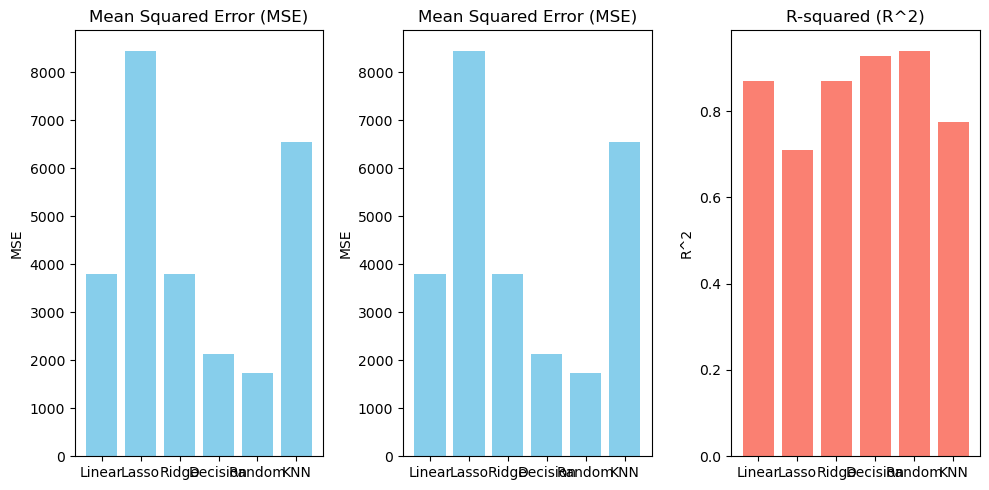

In [54]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.bar(models, mse_scores, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 3, 2)
plt.bar(models, mse_scores, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

plt.subplot(1, 3, 3)
plt.bar(models, r2_scores, color='salmon')
plt.title('R-squared (R^2)')
plt.ylabel('R^2')

plt.tight_layout()
plt.show()

In [82]:
import pickle
with open('mum.pickle','wb') as file:
    pickle.dump(rf, file)

In [56]:
2222      

2222

In [57]:
X.columns

Index(['bhk', 'area', 'Apartment', 'Independent House', 'Penthouse',
       'Studio Apartment', 'Villa', 'Agripada', 'Airoli', 'Ambarnath',
       ...
       'Vasai', 'Vashi', 'Vikhroli', 'Ville Parle East', 'Ville Parle West',
       'Virar', 'Virar West', 'Wadala', 'Worli', 'other'],
      dtype='object', length=122)

In [58]:
X.columns[2:7]

Index(['Apartment', 'Independent House', 'Penthouse', 'Studio Apartment',
       'Villa'],
      dtype='object')

In [59]:
X.columns[7:]

Index(['Agripada', 'Airoli', 'Ambarnath', 'Ambernath East', 'Ambernath West',
       'Andheri East', 'Andheri West', 'Anjurdive', 'Badlapur East',
       'Badlapur West',
       ...
       'Vasai', 'Vashi', 'Vikhroli', 'Ville Parle East', 'Ville Parle West',
       'Virar', 'Virar West', 'Wadala', 'Worli', 'other'],
      dtype='object', length=115)

In [60]:
#pickle.dump(rf,open('mum.pkl','wb'))

In [61]:
#pickle.dump(model, open('model.pkl','wb'))

In [62]:
# with open('.pkl', 'rb') as model_file:
#     model = pickle.load(model_file)

In [63]:
# # Load the trained model (replace 'house_price.pkl' with the correct path)
# with open('mum.pickle', 'rb') as file:
#     model = pickle.load(file)

In [64]:

# with open("cols.json", 'r') as obj:
#     data_columns = json.load(obj)["cols"]
#     area_types = data_columns[2:7]
#     locations = data_columns[7:]

In [65]:
# # Create a sample data point (adjust the values as needed)
# sample_data = {
#     "area_type": "Apartment",  # Replace with your sample data
#     "location": "Ghansoli",       # Replace with your sample data
#     "bhk": 3,                            # Replace with your sample data
#     "area": 1259                        # Replace with your sample data
# }

In [66]:
# # Create a DataFrame from the sample data (only one row)
# sample_df = pd.DataFrame([sample_data])

In [67]:
# # Preprocess the sample data (one-hot encoding for categorical variables)
# sample_df_encoded = pd.get_dummies(sample_df, columns=["area_type", "location"])

In [68]:
# # Initialize a NumPy array for the input features
# sample_features = np.zeros(len(data_columns))


In [69]:
# # Map the sample data to the feature array based on column names
# for col_name in sample_df_encoded.columns:
#     if col_name in data_columns:
#         col_index = data_columns.index(col_name)
#         sample_features[col_index] = sample_df_encoded[col_name].values[0]

In [70]:
# # Make predictions for the sample data
# predicted_price = model.predict([sample_features])[0]
# predicted_price = round(predicted_price, 2)


In [71]:
# print(f"Predicted Price for the Sample Data: {predicted_price} lakhs")

In [72]:
# Sample data (replace with your own data

In [73]:
# # column_name = ['total_sqft','bath','price','BHK']
# # Convert the sample data to a DataFrame
# sample_df = pd.DataFrame(sample_data)

# # Predict the house price using the loaded model
# prediction = model.predict(sample_df)
# print(f'Predicted House Price: ${prediction[0]:.2f}')

In [74]:
import os

In [75]:
print(os.getcwd())

C:\Users\Mukesh\OneDrive\Desktop\MSC STATS SY\ML\ML_project\mumbai_house


In [76]:
import sklearn
print(sklearn.__version__)

1.2.1


In [77]:
import sklearn
print(sklearn.__version__)

1.2.1


In [78]:
# def remove_BHK_outliers(df):
#     exclude_indices = np.array([])
#     for location, location_df in df.groupby('region'):
#         BHK_stats = {}
#         for BHK, BHK_df in location_df.groupby('bhk'):
#             BHK_stats[BHK] = {
#                 'mean': np.mean(BHK_df.price_per_sqft),
#                 'std': np.std(BHK_df.price_per_sqft),
#                 'count': BHK_df.shape[0]
#             }
#         for BHK, BHK_df in location_df.groupby('bhk'):
#             stats = BHK_stats.get(BHK-1)
#             if stats and stats['count']>5:
#                 exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
#     return df.drop(exclude_indices,axis='index')


In [79]:
# df1 = remove_BHK_outliers(data)

In [80]:
column_name = ['bhk', 'area', 'price_lakh',"price_per_sqft"]

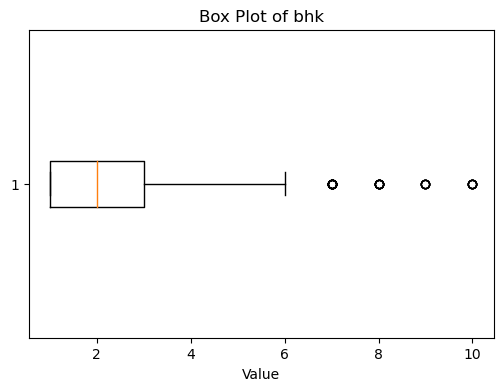

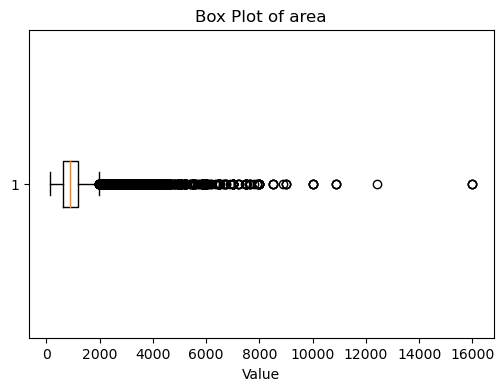

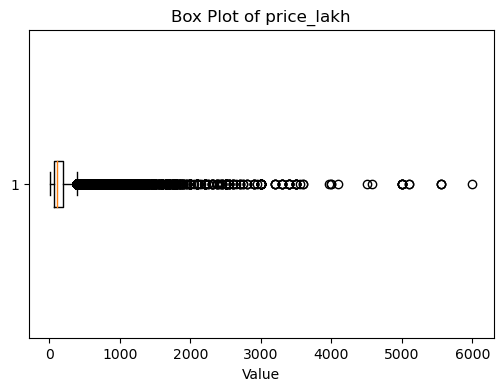

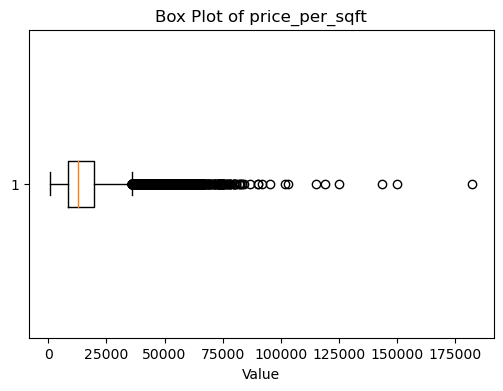

In [81]:
for column in column_name :
    plt.figure(figsize=(6, 4))
    plt.boxplot(data[column], vert=False, boxprops=dict())
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Value')
    plt.show()